In [80]:
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.metrics import mean_squared_error as mse

In [47]:
df = pd.read_csv('equip_failures_training_set.csv', na_values = 'na')

df.head(10)

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,...,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,2,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,3,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,4,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,5,0,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
5,6,0,38312,NaN,2.130706e+09,218.0,0.0,0.0,0.0,0.0,...,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0
6,7,0,14,0.0,6.000000e+00,NaN,0.0,0.0,0.0,0.0,...,168.0,48.0,60.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,0,102960,NaN,2.130706e+09,116.0,0.0,0.0,0.0,0.0,...,715518.0,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0.0,0.0
8,9,0,78696,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,...,699290.0,362510.0,1190028.0,1012704.0,160090.0,63216.0,41202.0,4.0,0.0,0.0
9,10,1,153204,0.0,1.820000e+02,NaN,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0


In [48]:
print("Number of Equipment Failures: ")
df.loc[df.target == 1, "target"].count()

Number of Equipment Failures: 


1000

In [49]:
print("Number of Equipment SUCCESS: ")
df.loc[df.target == 0, "target"].count()

Number of Equipment SUCCESS: 


59000

In [50]:
df = df.replace('na', 0)

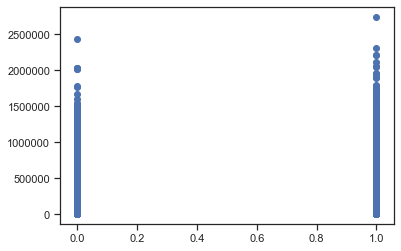

In [51]:
plt.scatter(x=df.target, y=df.sensor1_measure)
plt.show()

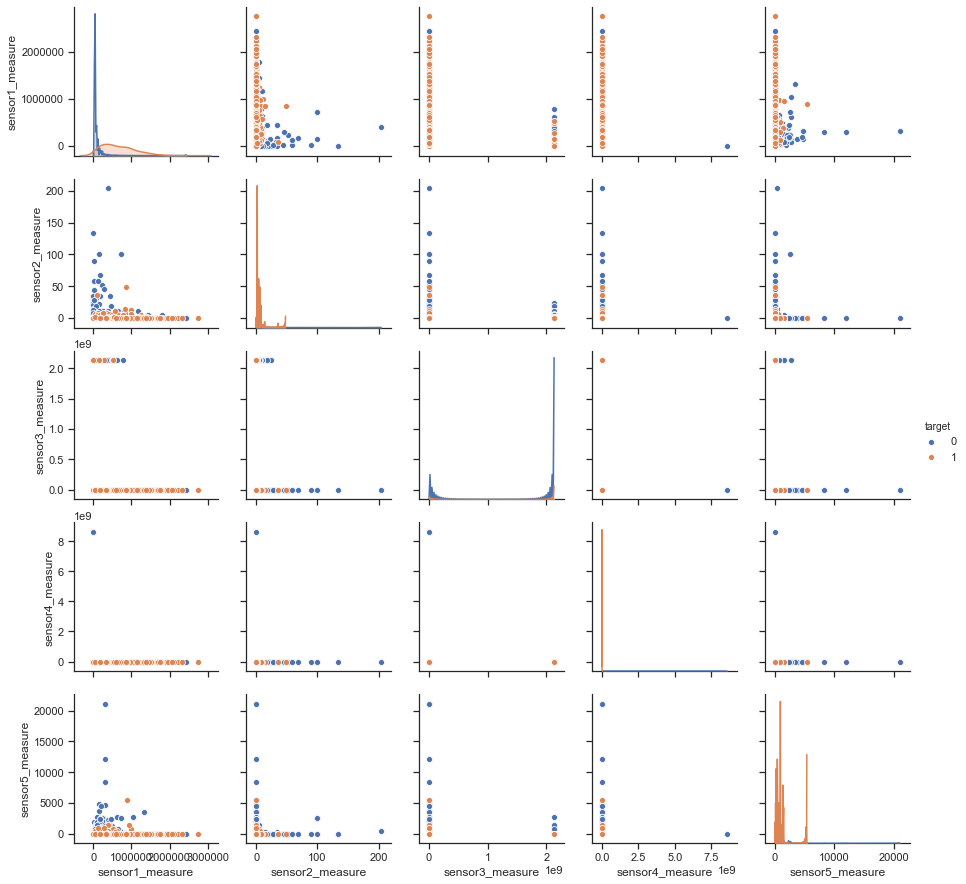

In [90]:
df.fillna(-1, inplace=True)

sns.pairplot(df, x_vars=["sensor1_measure", "sensor2_measure","sensor3_measure", "sensor4_measure", "sensor5_measure"], 
             y_vars=["sensor1_measure", "sensor2_measure", "sensor3_measure", "sensor4_measure", "sensor5_measure"],
             hue='target')
    

In [82]:
# split data 70/30
msk = np.random.rand(len(df)) < 0.8

train = df[msk]

test = df[~msk]

In [85]:
# knn = knn()

knn.fit(X=train.iloc[:,2:],y=train.iloc[:,1])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [89]:
result = knn.predict(test.iloc[:,2:])
result

array([0. , 0.4, 0. , ..., 0. , 0. , 0. ])

In [88]:
err = mse(y_true = test.iloc[:,1], y_pred=result)
err

0.006803381602075835